In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the Data Base (DB)
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database: 

# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = dt.datetime.strptime(last_date[0],'%Y-%m-%d')
last_date_format = last_date.date()
last_date_format.isoformat()


'2017-08-23'

In [9]:
# Calculate the date one year earlier the last date in data set.
date_year_ago = last_date - dt.timedelta(days=365)
date_year_ago_format = date_year_ago.date()
date_year_ago_format.isoformat()

'2016-08-23'

In [10]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

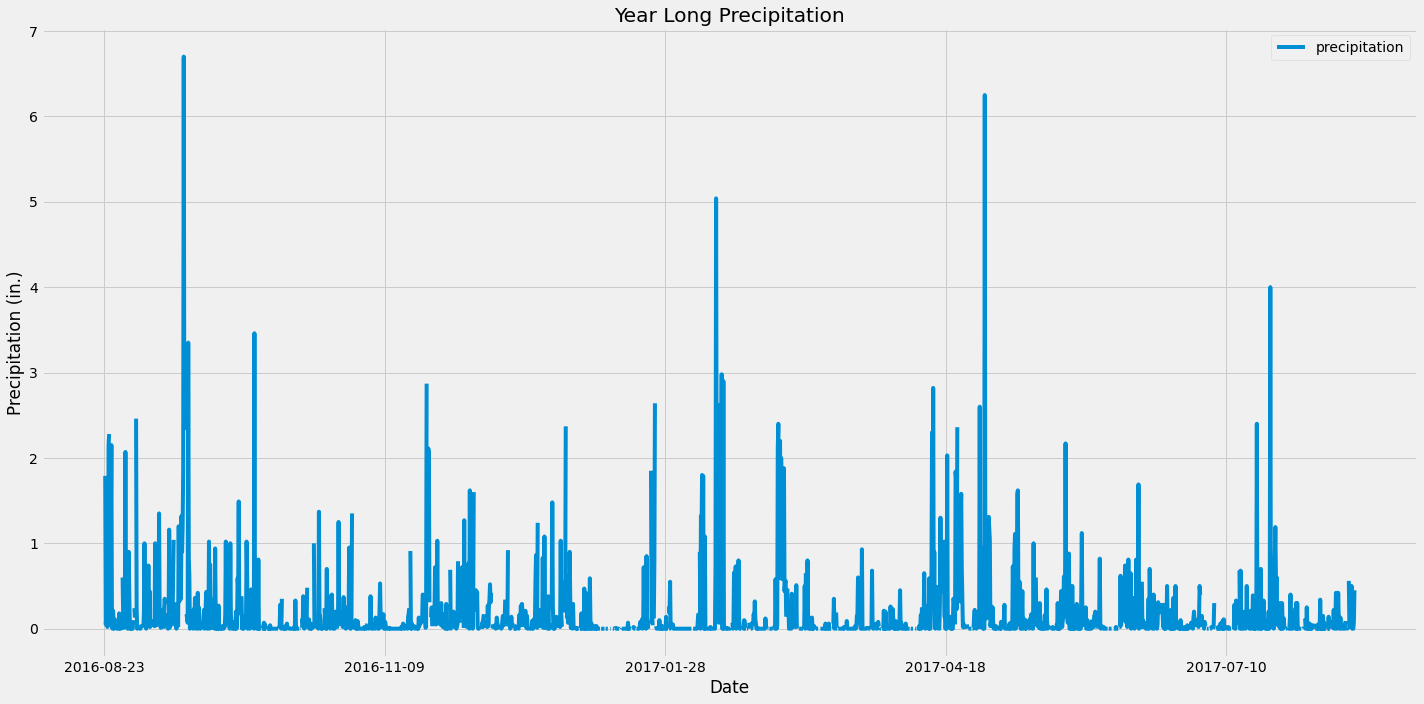

In [11]:




# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns = ['date', 'precipitation'])
precipitation_df.set_index('date', inplace = True)
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')
precipitation_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
precipitation_df.plot(ax = ax, x_compat = True)

#title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Year Long Precipitation")

#plt.savefig("Images/precipitation.png")
plt.savefig("precipitation.png")
#plot
plt.tight_layout()
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(precipitation_df.describe(),2)

,precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).distinct().count()
station_count

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_list = (session.query(Station.station, Station.name, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
station_list

[('USC00519397', 'WAIKIKI 717.2, HI US', 24948),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 24516),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 24381),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 24021),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 23508),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 19818),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 17811),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 12348),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 4599)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Find the most active station
most_active_station = station_list[0]
most_active_station


('USC00519397', 'WAIKIKI 717.2, HI US', 24948)

In [16]:
# Find the Lowest Temperature
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).all()[0][0]
min_temp

56.0

In [17]:
# Find the Highest Temperatiure
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).all()[0][0]
max_temp

87.0

In [18]:
# Find the Average Temperature
avg_temp = round(session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).all()[0][0],2)
avg_temp

74.55

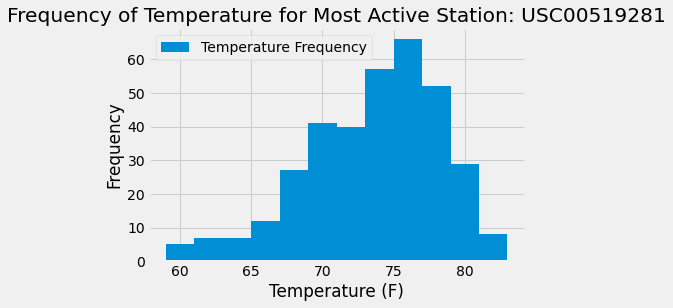

In [19]:
temp_data = session.query(Measurement.date,Measurement.tobs,Measurement.station).\
              filter(Measurement.date >= date_year_ago).\
              filter(Measurement.station == 'USC00519281').all()

#Plot historgram with temperature data for USC00519281
temp_data = pd.DataFrame(temp_data,columns = ['date','tobs','station'])
number_of_bins = 12
temp_data
temp_data.plot.hist(bins = number_of_bins)
plt.title('Frequency of Temperature for Most Active Station: USC00519281')
plt.legend(['Temperature Frequency'])
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')

plt.show()

# Close session

In [20]:
# Close Session
session.close()